In [6]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt
import copy
pd.options.mode.chained_assignment = None

In [9]:
df = pd.read_csv("/home/memari/jhu_centering/tables/ios_activity_cleaned.csv", parse_dates=['date'])
df.columns

Index(['device_id', 'date', 'stationary', 'walking', 'running', 'automotive',
       'cycling', 'unknown'],
      dtype='object')

In [8]:
def find_first_day(device_id, df):
    df_target = df[df['device_id']==device_id]
    return min(df_target['date'])
def halve(df):
    first_day = {device_id:find_first_day(device_id, df) 
                 for device_id in set(df['device_id'].tolist())
                if find_first_day(device_id, df)>=datetime.date(year=2022,month=11,day=11)}
    df = df[df['device_id'].isin(first_day)]
    df['day'] = df.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_1_14 = df[df['day'] <=14]
    df_15_28 = df[(df['day'] >14) & (df['day']<=28)]
    return df_1_14,df_15_28
df_1_14,df_15_28 = halve(df)
df_plot_1_14 = copy.deepcopy(df_1_14)
df_plot_1_14 = df_plot_1_14.groupby('day').mean()
df_plot_1_14= df_plot_1_14.reset_index()
df_plot_15_28 = copy.deepcopy(df_15_28)
df_plot_15_28 = df_plot_15_28.groupby('day').mean()
df_plot_15_28= df_plot_15_28.reset_index()

In [10]:
df_plot_1_14 = copy.deepcopy(df_1_14)
df_plot_1_14 = df_plot_1_14[['day','device_id', 'stationary', 'walking', 'running', 'automotive',
       'cycling']]
df_plot_1_14

,day,device_id,stationary,walking,running,automotive,cycling
0,1,00e17b8a-4b0f-4230-bd26-3df2853e8916,467,221,2,187,0
1,2,00e17b8a-4b0f-4230-bd26-3df2853e8916,741,182,0,188,0
2,3,00e17b8a-4b0f-4230-bd26-3df2853e8916,780,298,6,409,0
3,4,00e17b8a-4b0f-4230-bd26-3df2853e8916,943,462,1,500,0
4,5,00e17b8a-4b0f-4230-bd26-3df2853e8916,836,321,1,334,0
...,...,...,...,...,...,...,...
2632,10,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,917,336,15,109,0
2633,11,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2071,331,0,240,0
2634,12,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,566,120,0,102,0
2635,13,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,915,107,0,180,0


In [11]:
df_plot_15_28 = copy.deepcopy(df_15_28)
df_plot_15_28 = df_plot_15_28[['day','device_id', 'stationary', 'walking', 'running', 'automotive',
       'cycling']]
df_plot_15_28

,day,device_id,stationary,walking,running,automotive,cycling
14,15,00e17b8a-4b0f-4230-bd26-3df2853e8916,745,276,0,212,7
15,16,00e17b8a-4b0f-4230-bd26-3df2853e8916,749,208,3,252,0
16,17,00e17b8a-4b0f-4230-bd26-3df2853e8916,759,194,2,302,0
17,18,00e17b8a-4b0f-4230-bd26-3df2853e8916,884,216,0,256,0
18,19,00e17b8a-4b0f-4230-bd26-3df2853e8916,926,226,1,324,0
...,...,...,...,...,...,...,...
2646,24,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,1182,184,3,25,0
2647,25,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,761,332,6,165,0
2648,26,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,967,144,0,450,10
2649,27,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,1376,31,0,0,0


In [16]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')
df_group = df_id.merge(df_group, on='survey_id', how='left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)

df_plot_1_14 = df_plot_1_14.merge(df_group[['device_id', 'group_x']],
                   on='device_id', how='left')
df_plot_15_28 = df_plot_15_28.merge(df_group[['device_id', 'group_x']],
                   on='device_id', how='left')

In [17]:
grouped_1_14 = df_plot_1_14 .groupby(['group_x'])
df_dict = {group: data for group, data in grouped_1_14}
active_control_1_14 = df_dict['Active Control']
experimental_condition_1_14 = df_dict['Experimental Condition']
passive_control_1_14 = df_dict['Passive Control']

In [18]:
grouped_15_28 = df_plot_15_28 .groupby(['group_x'])
df_dict = {group: data for group, data in grouped_15_28}
active_control_15_28 = df_dict['Active Control']
experimental_condition_15_28 = df_dict['Experimental Condition']
passive_control_15_28 = df_dict['Passive Control']

active_control: t-statistic=-2.18 and p-value=0.03
experimental_condition: t-statistic=-2.18 and p-value=0.19
passive_control: t-statistic=-2.18 and p-value=0.55


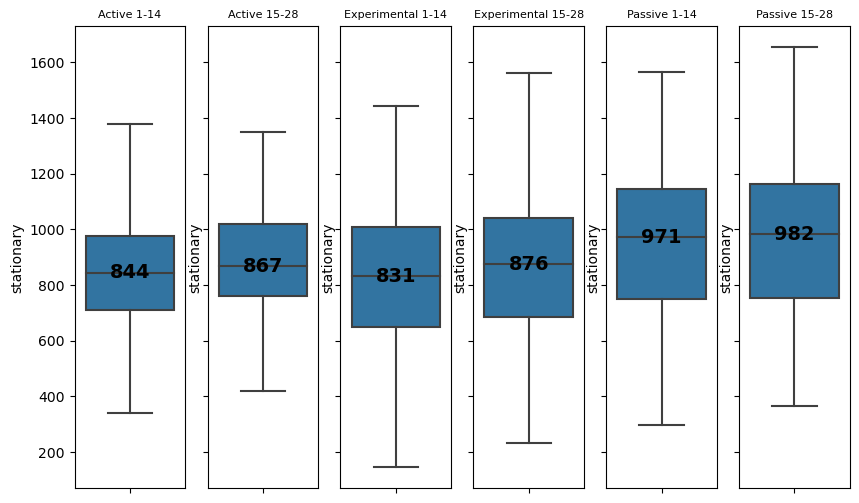

active_control: t-statistic=1.50 and p-value=0.13
experimental_condition: t-statistic=1.50 and p-value=0.76
passive_control: t-statistic=1.50 and p-value=0.58


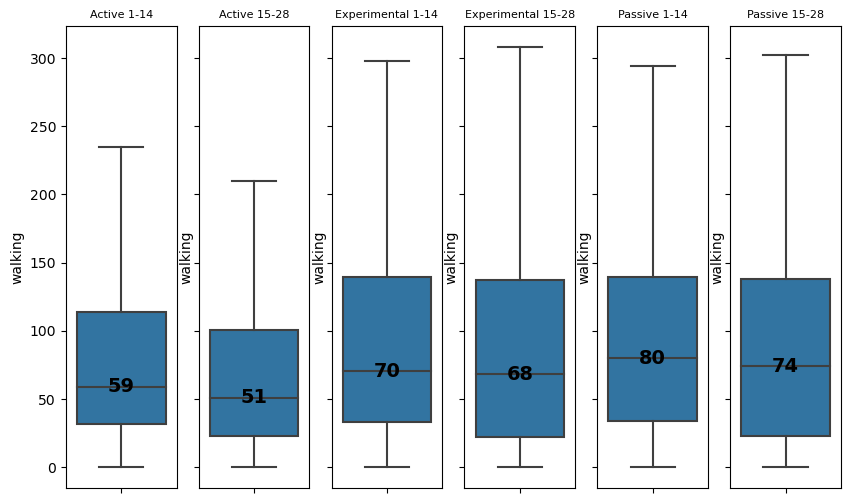

active_control: t-statistic=1.48 and p-value=0.14
experimental_condition: t-statistic=1.48 and p-value=0.24
passive_control: t-statistic=1.48 and p-value=0.92


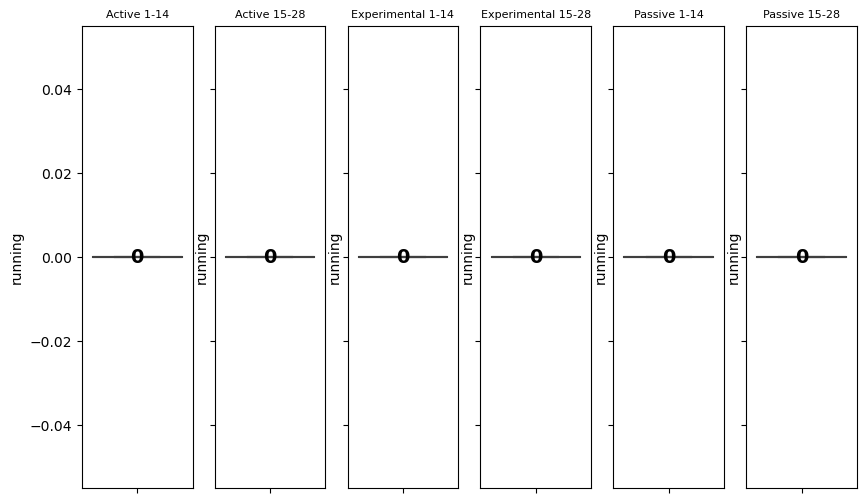

active_control: t-statistic=-0.23 and p-value=0.82
experimental_condition: t-statistic=-0.23 and p-value=0.24
passive_control: t-statistic=-0.23 and p-value=0.65


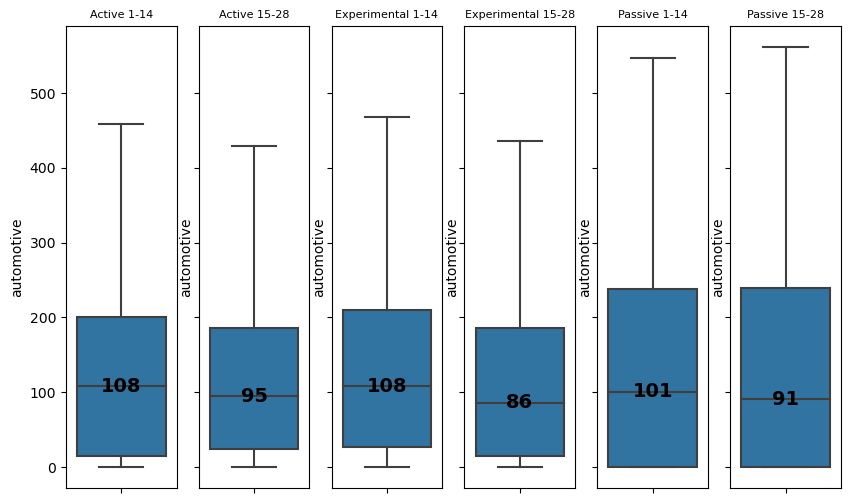

active_control: t-statistic=1.44 and p-value=0.15
experimental_condition: t-statistic=1.44 and p-value=0.56
passive_control: t-statistic=1.44 and p-value=0.00


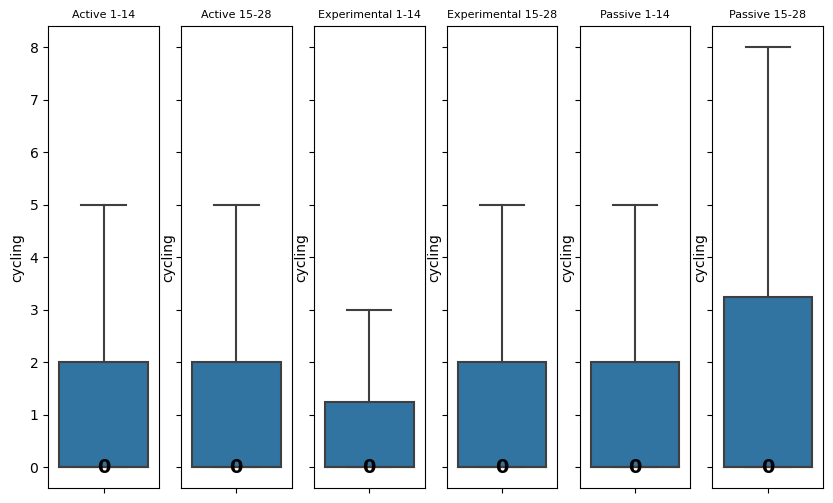

In [19]:
from scipy.stats import ttest_ind
mylist = ['stationary', 'walking', 'running', 'automotive',
       'cycling']
for clm in mylist:
    fig, (ax1, ax2, ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(10, 6), sharey=True)
    sns.boxplot(y=active_control_1_14[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=active_control_15_28[clm], orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=experimental_condition_1_14[clm],orient="v", showfliers=False, ax=ax3)
    sns.boxplot(y=experimental_condition_15_28[clm],orient="v", showfliers=False, ax=ax4)
    sns.boxplot(y=passive_control_1_14[clm], orient="v", showfliers=False, ax=ax5)
    sns.boxplot(y=passive_control_15_28[clm], orient="v", showfliers=False, ax=ax6)

    ax1.set_title("Active 1-14", fontsize=8)
    m1 = int(active_control_1_14[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax2.set_title("Active 15-28", fontsize=8)
    m2 = int(active_control_15_28[clm].median())
    ax2.text(0, m2, m2, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax3.set_title("Experimental 1-14", fontsize=8)
    m3 = int(experimental_condition_1_14[clm].median())
    ax3.text(0, m3, m3, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax4.set_title("Experimental 15-28", fontsize=8)
    m4 = int(experimental_condition_15_28[clm].median())
    ax4.text(0, m4, m4, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax5.set_title("Passive 1-14", fontsize=8)
    m5 = int(passive_control_1_14[clm].median())
    ax5.text(0, m5, m5, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax6.set_title("Passive 15-28", fontsize=8)
    m6 = int(passive_control_15_28[clm].median())
    ax6.text(0, m6, m6, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    t, p = ttest_ind(active_control_1_14[clm], active_control_15_28[clm])
    print('active_control: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    stat, p = ttest_ind(experimental_condition_1_14[clm], experimental_condition_15_28[clm])
    print('experimental_condition: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    stat, p = ttest_ind(passive_control_1_14[clm], passive_control_15_28[clm])
    print('passive_control: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    plt.show()